<a href="https://colab.research.google.com/github/amanchoudhary1812/Deep-Learning/blob/main/(DL)Experiment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [ ]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Preprocess the data
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [ ]:
# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)



Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 48s 54ms/step - accuracy: 0.8640 - loss: 0.4544 - val_accuracy: 0.9803 - val_loss: 0.0689
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 79s 51ms/step - accuracy: 0.9817 - loss: 0.0586 - val_accuracy: 0.9830 - val_loss: 0.0561
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 51ms/step - accuracy: 0.9872 - loss: 0.0391 - val_accuracy: 0.9897 - val_loss: 0.0389
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 51ms/step - accuracy: 0.9913 - loss: 0.0280 - val_accuracy: 0.9910 - val_loss: 0.0299
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 43s 51ms/step - accuracy: 0.9933 - loss: 0.0214 - val_accuracy: 0.9910 - val_loss: 0.0347


In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.2f}")


313/313 - 3s - 10ms/step - accuracy: 0.9914 - loss: 0.0265
Test accuracy: 0.99


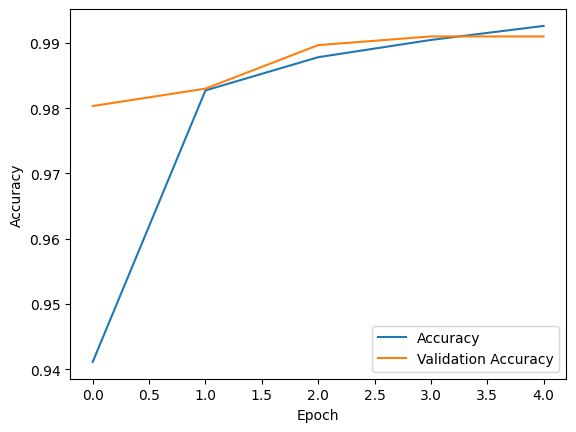

In [ ]:
# Plot training history
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Save the model
model.save('cnn_mnist_model.h5')